In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv('dom_change_percent.csv')

In [4]:
data

,Unnamed: 0,country,price_type,market,commodity,percent,post_covid,yearly
0,0,Cote d'Ivoire,Retail,Abidjan,AttiÃ©kÃ©,NaN,-0.061538,-0.031746
1,1,Cameroon,Retail,YaundÃ©,Bananas (plantains),NaN,0.000000,0.000000
2,2,Cameroon,Retail,Bafoussam,Bananas (plantains),NaN,-0.305556,0.041667
3,3,Morocco,Retail,National Average,Barley (imported),NaN,-0.034483,-0.034483
4,4,Cote d'Ivoire,Retail,Abidjan,Banana (plantains),NaN,0.769231,0.232143
...,...,...,...,...,...,...,...,...
1139,1139,Benin,Retail,Parakou,Yam,NaN,0.057143,0.027778
1140,1140,Benin,Retail,Natitingou,Yam,NaN,0.088235,0.057143
1141,1141,Benin,Retail,Cotonou,Yam,NaN,0.057692,0.100000
1142,1142,Ghana,Wholesale,Tamale,Yam,NaN,-0.090909,0.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1144 non-null   int64  
 1   country     1144 non-null   object 
 2   price_type  1144 non-null   object 
 3   market      1144 non-null   object 
 4   commodity   1144 non-null   object 
 5   percent     0 non-null      float64
 6   post_covid  1144 non-null   float64
 7   yearly      1144 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 71.6+ KB


In [6]:
for column in data.columns:
    print("Unique values:",column)
    print(data[column].unique())
    print()

Unique values: Unnamed: 0
[   0    1    2 ... 1141 1142 1143]

Unique values: country
["Cote d'Ivoire" 'Cameroon' 'Morocco' 'Democratic Republic of the Congo'
 'Rwanda' 'Costa Rica' 'United Republic of Tanzania' 'Uganda' 'Haiti'
 'Dominican Republic' 'Guatemala' 'Mexico' 'Panama' 'El Salvador'
 'Honduras' 'Nicaragua' 'Iraq' 'Argentina' 'Egypt' 'Azerbaijan' 'Botswana'
 'Georgia' 'Kazakhstan' 'Kyrgyzstan' 'Mauritania' 'Mongolia' 'Afghanistan'
 'Tajikistan' 'Russian Federation' 'South Africa' 'Tunisia' 'Bolivia'
 'Chile' 'Zimbabwe' 'Israel' 'Peru' 'Brazil' 'Eswatini' 'Belarus'
 'Armenia' 'Occupied Palestinian Territory' 'Japan' 'Zambia' 'South Sudan'
 'Mozambique' 'Angola' 'Thailand' 'Paraguay' 'Benin' 'Cabo Verde' 'Togo'
 'Ghana' 'Malawi' 'Yemen' 'Samoa' 'India' 'Saudi Arabia' 'Myanmar'
 'Nigeria' 'Burundi' 'Chad' 'Ecuador' 'Ethiopia' 'Kenya' 'Niger' 'Guinea'
 'Colombia' 'Philippines' 'Somalia' 'Namibia' 'Senegal' 'Sudan'
 'Burkina Faso' 'Mali' 'Sierra Leone' 'Cambodia' 'Indonesia' 'Urug

In [7]:
data = data.drop(columns=["percent"], errors="ignore")

In [8]:
data.isnull().sum()

Unnamed: 0    0
country       0
price_type    0
market        0
commodity     0
post_covid    0
yearly        0
dtype: int64

In [9]:
df_cleaned = data.dropna()

In [10]:
df_cleaned = df_cleaned.drop_duplicates()

In [11]:
print("Original rows:", len(data))
print("After removing missing values:", len(df_cleaned))
print("Duplicates removed:", len(data) - len(df_cleaned))

Original rows: 1144
After removing missing values: 1144
Duplicates removed: 0


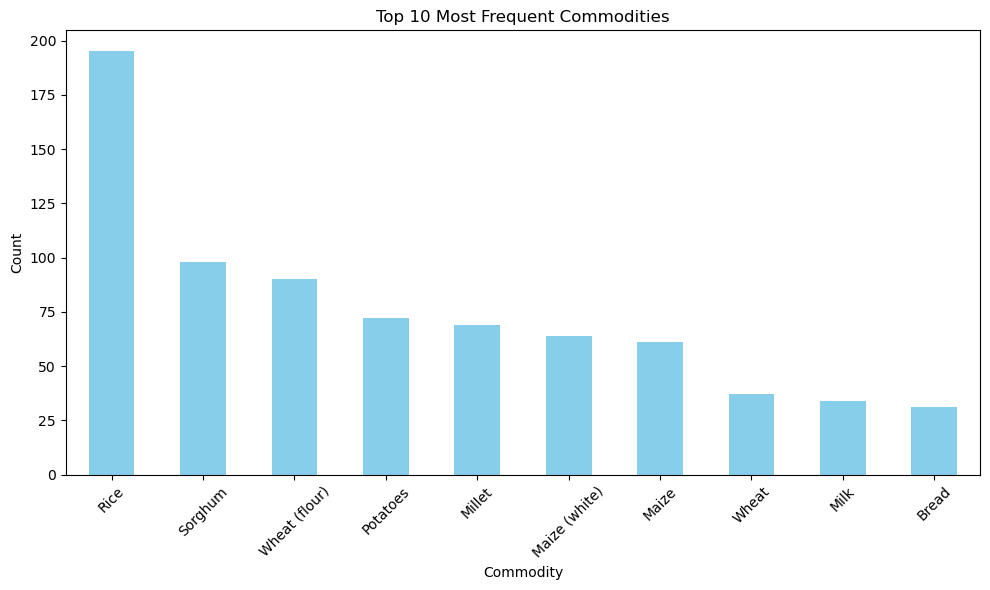

In [12]:
plt.figure(figsize=(10, 6))
df_cleaned['commodity'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Commodities')
plt.xlabel('Commodity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

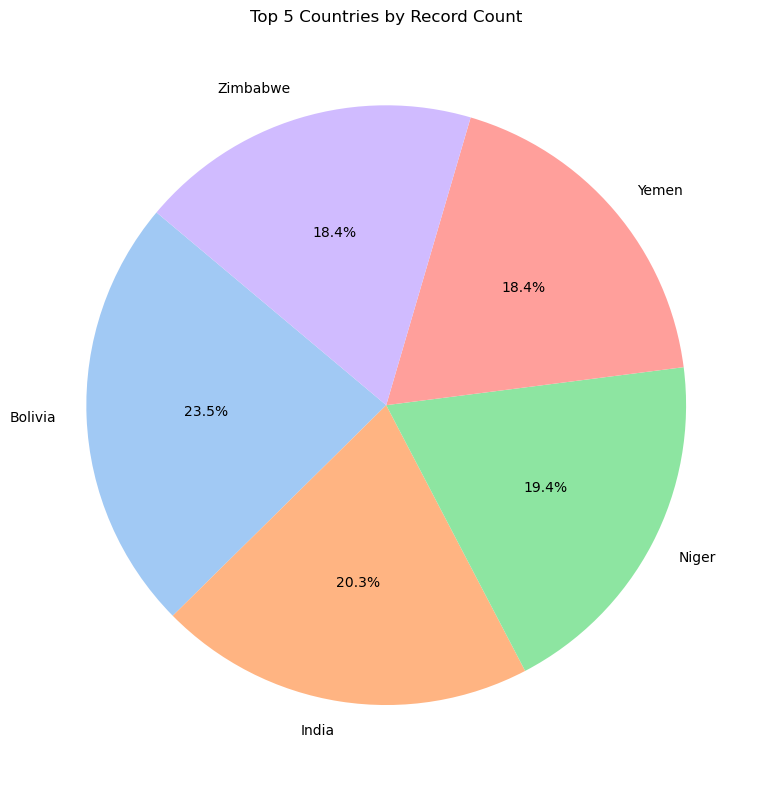

In [13]:
plt.figure(figsize=(8, 8))
df_cleaned['country'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Top 5 Countries by Record Count')
plt.ylabel('')
plt.tight_layout()
plt.show()

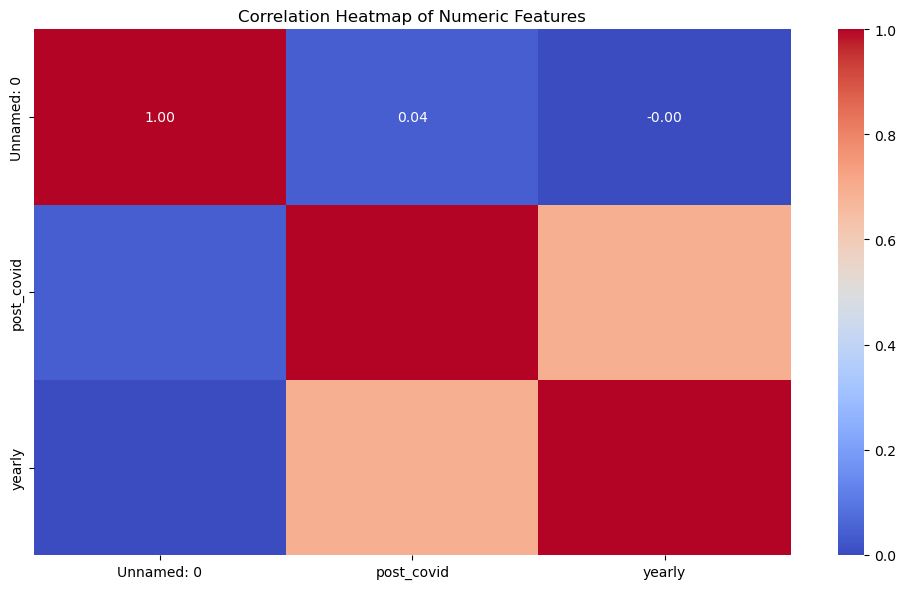

In [14]:
plt.figure(figsize=(10, 6))
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

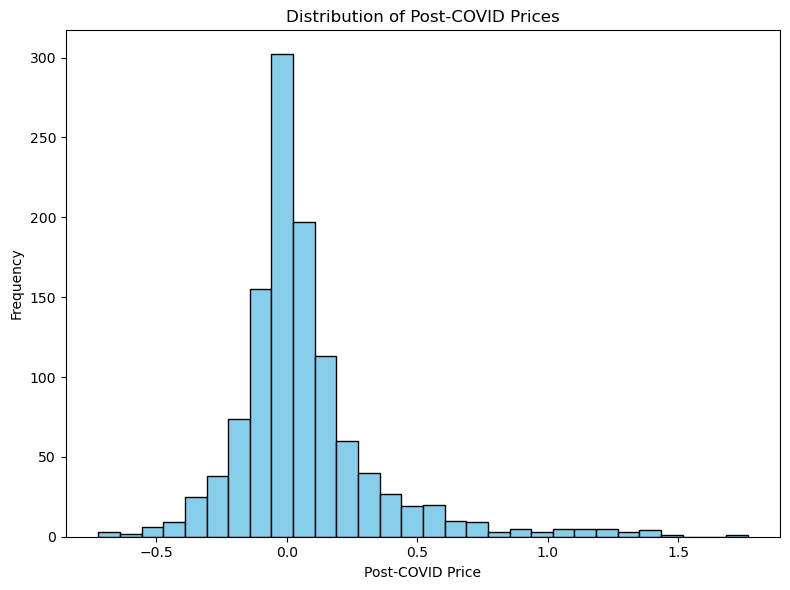

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['post_covid'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Post-COVID Prices')
plt.xlabel('Post-COVID Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


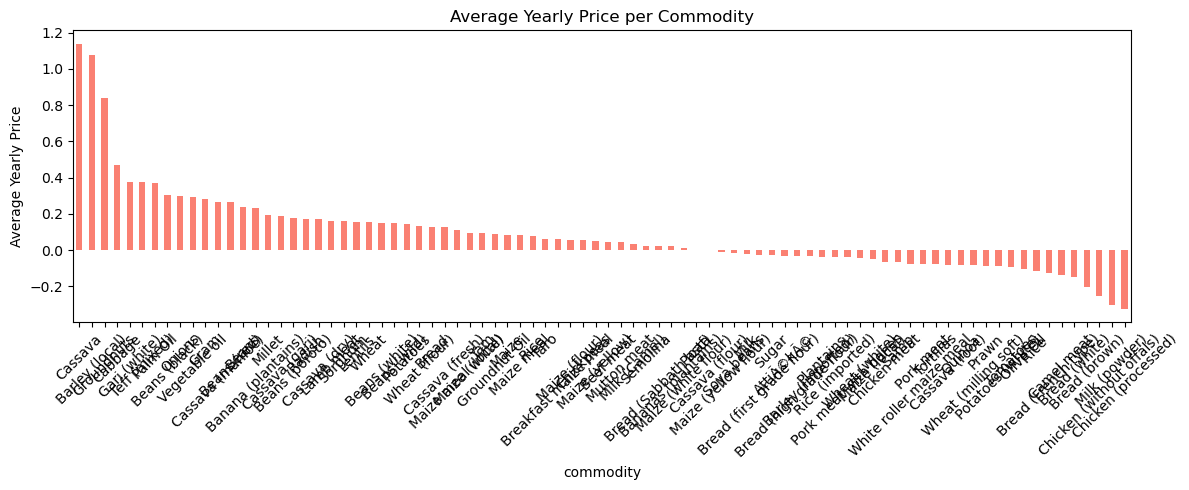

In [16]:
commodity_avg = data.groupby('commodity')['yearly'].mean().sort_values(ascending=False)
commodity_avg.plot(kind='bar', figsize=(12, 5), color='salmon')
plt.title('Average Yearly Price per Commodity')
plt.ylabel('Average Yearly Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


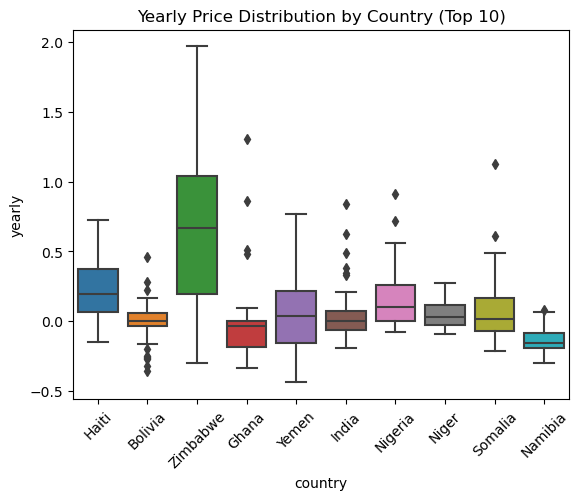

In [17]:
top_countries = data['country'].value_counts().nlargest(10).index
subset = data[data['country'].isin(top_countries)]
sns.boxplot(data=subset, x='country', y='yearly')
plt.xticks(rotation=45)
plt.title('Yearly Price Distribution by Country (Top 10)')
plt.show()


# Pivot Tables

In [51]:
# Pivot Table: Average yearly change per country
pivot_country = data.pivot_table(values='yearly', index='country', aggfunc='mean')
print("\nAverage Yearly Change per Country:")
print(pivot_country.sort_values(by='yearly', ascending=False))


Average Yearly Change per Country:
           yearly
country          
75       1.308377
76       0.841414
84       0.727273
87       0.647179
12       0.409921
...           ...
24      -0.127967
54      -0.135171
72      -0.135799
27      -0.201207
1       -0.281234

[88 rows x 1 columns]


In [53]:
# Pivot Table: Average yearly change per commodity
pivot_commodity = data.pivot_table(values='yearly', index='commodity', aggfunc='mean')
print("\nAverage Yearly Change per Commodity:")
print(pivot_commodity.sort_values(by='yearly', ascending=False))



Average Yearly Change per Commodity:
             yearly
commodity          
22         1.139535
4          1.076923
36         0.841584
20         0.467499
33         0.377906
...             ...
18        -0.150396
15        -0.202244
30        -0.254310
50        -0.303679
29        -0.324324

[84 rows x 1 columns]


In [55]:
# Pivot Table: Average yearly change per market
pivot_market = data.pivot_table(values='yearly', index='market', aggfunc='mean')
print("\nAverage Yearly Change per Market:")
print(pivot_market.sort_values(by='yearly', ascending=False))



Average Yearly Change per Market:
          yearly
market          
257     2.190476
133     1.615385
68      1.610614
76      1.600000
8       1.509181
...          ...
10     -0.214573
259    -0.216139
158    -0.242631
237    -0.250000
157    -0.281234

[284 rows x 1 columns]


In [18]:
cat_cols = data.select_dtypes(include='object').columns

In [19]:
label_cols = ['country', 'price_type', 'market', 'commodity']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])


In [20]:
num_cols = data.select_dtypes(include=np.number).columns


In [21]:
X = data.drop(['yearly'], axis=1)
y = data['yearly']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()

In [32]:
X_train_scaled= scaler.fit_transform(X_train)

In [33]:
X_test_scaled = scaler.transform(X_test)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [38]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name} - R2 Score: {r2_score(y_test, preds):.4f}, RMSE: {mean_squared_error(y_test, preds, squared=False):.4f}")

# KNN Regressor

In [39]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("\nKNN Regressor:")
print("R² Score:", r2_score(y_test, y_pred_knn))
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))


KNN Regressor:
R² Score: 0.5639271160724224
MAE: 0.13493959582270743
MSE: 0.03937284527528845


# Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("\nLinear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression:
R² Score: 0.5103057481521569
MAE: 0.1371105776385246
MSE: 0.044214297015095695


# SVM

In [41]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
print("\nSupport Vector Regressor:")
print("R² Score:", r2_score(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))


Support Vector Regressor:
R² Score: 0.5388714335239622
MAE: 0.13011608522897436
MSE: 0.04163511277369845


# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("\nDecision Tree Regressor:")
print("R² Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree Regressor:
R² Score: 0.2543052802415975
MAE: 0.15342702712227074
MSE: 0.06732847628407744


# Random forest

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("\nRandom Forest Regressor:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))



Random Forest Regressor:
R² Score: 0.6342506872438973
MAE: 0.11398644640283843
MSE: 0.03302335832255222


# Ada Boost

In [44]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train_scaled, y_train)
y_pred_ada = ada.predict(X_test_scaled)
print("\nAdaBoost Regressor:")
print("R² Score:", r2_score(y_test, y_pred_ada))
print("MAE:", mean_absolute_error(y_test, y_pred_ada))
print("MSE:", mean_squared_error(y_test, y_pred_ada))


AdaBoost Regressor:
R² Score: 0.3297969316730711
MAE: 0.19977653606003
MSE: 0.06051236544357617


# Gradient Boost

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
print("\nGradient Boosting Regressor:")
print("R² Score:", r2_score(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))


Gradient Boosting Regressor:
R² Score: 0.6194135910886681
MAE: 0.1162240622065582
MSE: 0.03436299376604252


In [46]:
# XG Boost

In [47]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print("\nXGBoost Regressor:")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))


XGBoost Regressor:
R² Score: 0.5564012849719948
MAE: 0.11966492784089466
MSE: 0.040052349538007764


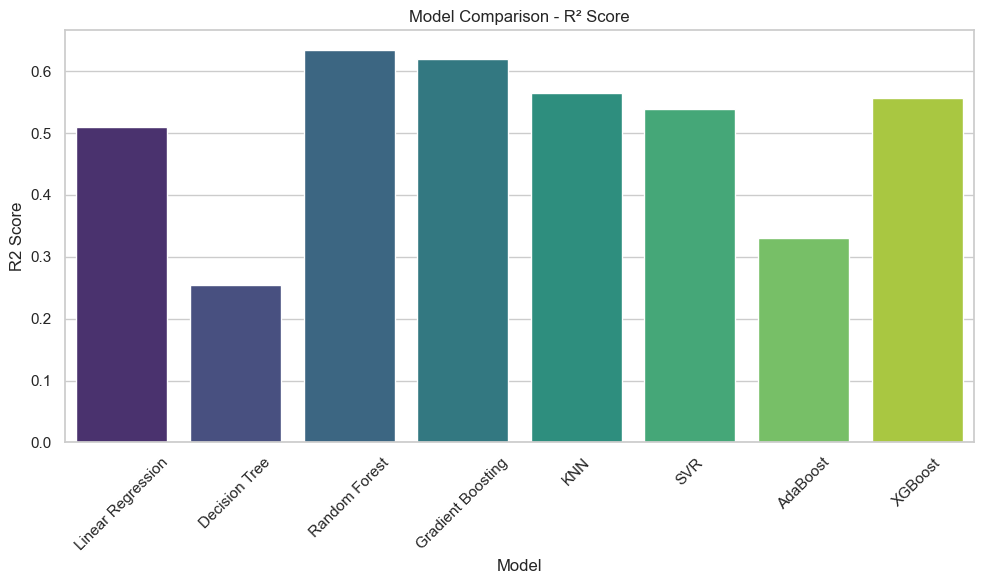

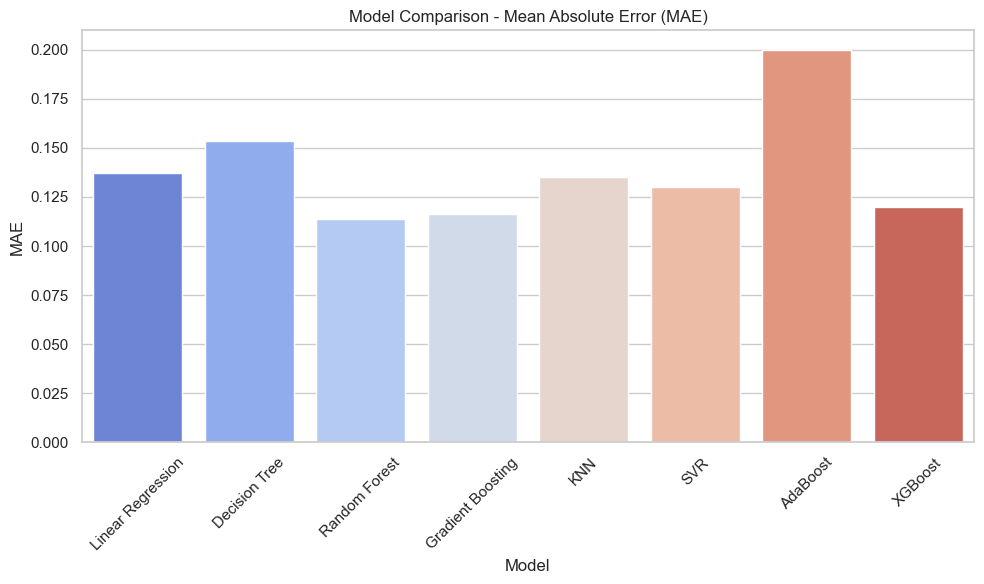

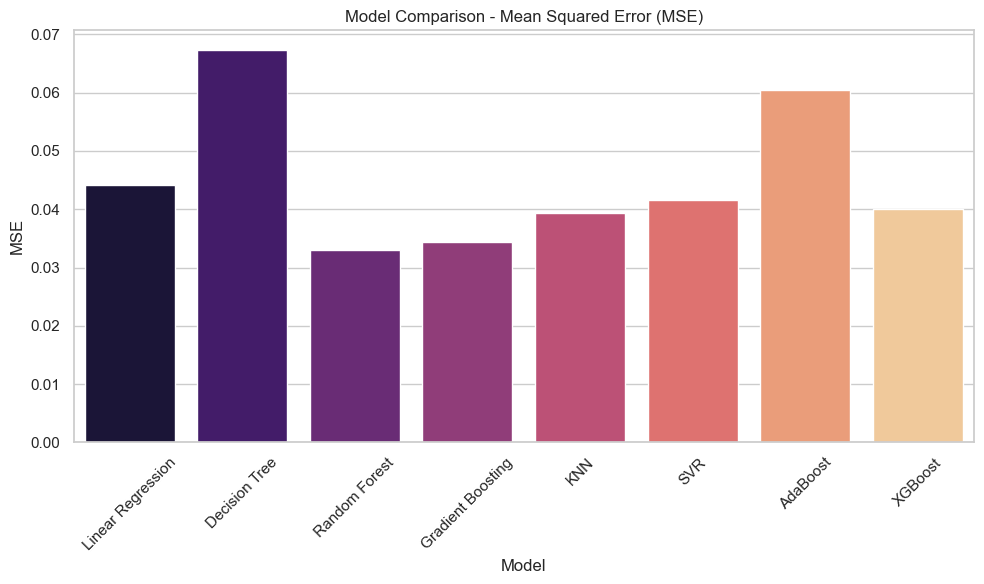

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
results = {
    "Model": [
        "Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting",
        "KNN", "SVR", "AdaBoost", "XGBoost"
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gb),
        r2_score(y_test, y_pred_knn),
        r2_score(y_test, y_pred_svr),
        r2_score(y_test, y_pred_ada),
        r2_score(y_test, y_pred_xgb)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_gb),
        mean_absolute_error(y_test, y_pred_knn),
        mean_absolute_error(y_test, y_pred_svr),
        mean_absolute_error(y_test, y_pred_ada),
        mean_absolute_error(y_test, y_pred_xgb)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_gb),
        mean_squared_error(y_test, y_pred_knn),
        mean_squared_error(y_test, y_pred_svr),
        mean_squared_error(y_test, y_pred_ada),
        mean_squared_error(y_test, y_pred_xgb)
    ]
}
import pandas as pd
results_df = pd.DataFrame(results)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="R2 Score", palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Comparison - R² Score")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="MAE", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Model Comparison - Mean Absolute Error (MAE)")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="MSE", palette="magma")
plt.xticks(rotation=45)
plt.title("Model Comparison - Mean Squared Error (MSE)")
plt.tight_layout()
plt.show()
